# Problem Statement:

**Customer level data for Pre-paid consumers of a leading telecom firm in South-East asian and Indian matket is given. Predict the churn in the last (Churn) month using the feature data from the first three months, based on Usage based Churn definition. Also analyze the factors which are most prominent in driving a customer to Churn.**

 

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows', 300)

In [3]:
df=pd.read_csv("telecom_churn_data.csv")

In [4]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

**Checking the data strcuture according to datatypes, variable names, values**

<font color=green>**1. Data type**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


<font color=green>**2. Variable names**

<font color=red>**2.1 variables categorization according to 6th, 7th and 8th months**

In [6]:
var6 = [col for col in df.columns if '_6' in col]
var7 = [col for col in df.columns if '_7' in col]
var8 = [col for col in df.columns if '_8' in col]

**Checking the number and column names under this categorization**

**Column names of 6th month**

In [7]:
var6

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 

**Column names of 7th month**

In [8]:
var7

['last_date_of_month_7',
 'arpu_7',
 'onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'total_og_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7',
 'total_rech_num_7',
 'total_rech_amt_7',
 'max_rech_amt_7',
 'date_of_last_rech_7',
 'last_day_rch_amt_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7',
 'vol_2g_mb_7',
 'vol_3g_mb_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'monthly_2g_7',
 'sachet_2g_7',
 'monthly_3g_7',
 

**Column names of 8th month**

In [9]:
var8

['last_date_of_month_8',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 

<font color=red>**2.2 variables categorization according to transaction type**

In [10]:
varic = [col for col in df.columns if '_ic_' in col]
varog = [col for col in df.columns if '_og_' in col]
var2g = [col for col in df.columns if '_2g_' in col]
var3g = [col for col in df.columns if '_3g_' in col]

**Checking the number and column names under this categorization**

In [11]:
len(varic)

53

In [12]:
varic

['loc_ic_t2o_mou',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'std_ic_mou_9',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_9',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'spl_ic_mou_9',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_i

In [13]:
len(varog)

58

In [14]:
varog

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_9',
 'spl_og_mou_6

In [15]:
len(var2g)

20

In [16]:
var2g

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_2g_mb_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9']

In [17]:
len(var3g)

20

In [18]:
var3g

['count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'vol_3g_mb_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9']

In [19]:
round(100*df.isnull().sum()/len(df.index)).sort_values(ascending=False)

max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
av_rech_am

<font color=green>**Missing value treatment in columns containing >70% null values**

In [20]:
#First replacing the missing values in all the columns related to data recharges like- 'av_rech_amt_data' and 'total_rech_data' 
#columns by 0, since these columns contain huge number of null values and we dont have any information about date of 
#recharge/ data recharge amount, 2g,3g recharge.
#we will replace these missing fields with 0

In [21]:
col6=['av_rech_amt_data_6','total_rech_data_6','max_rech_data_6','count_rech_3g_6','date_of_last_rech_data_6','arpu_3g_6','fb_user_6','count_rech_2g_6','night_pck_user_6','arpu_2g_6']

In [22]:
df[col6]=df[col6].replace(np.nan,0)

In [23]:
col7=['total_rech_data_7','date_of_last_rech_data_7','arpu_2g_7','arpu_3g_7','av_rech_amt_data_7','count_rech_3g_7','count_rech_2g_7','night_pck_user_7','max_rech_data_7','fb_user_7']

In [24]:
df[col7]=df[col7].replace(np.nan,0)

In [25]:
col8=['date_of_last_rech_data_8','total_rech_data_8','count_rech_3g_8','count_rech_2g_8','max_rech_data_8','av_rech_amt_data_8','arpu_2g_8','arpu_3g_8','fb_user_8','night_pck_user_8']

In [26]:
df[col8]=df[col8].replace(np.nan,0)

# Identifying the High value customers (HVC)

In [27]:
#We need to do the study for only the high value customers which need to be filtered by total recharge amount
#We need to calculate Total recharge amount by adding the total_rech_amnt and total recharge amount of data
#total recharge in data needs to be found out by multiplying average data rechare and number of data recharges
#all the column involved here have o missing values now

In [28]:
df[['total_rech_data_6','av_rech_amt_data_6','total_rech_amt_6']].isnull().sum()

total_rech_data_6     0
av_rech_amt_data_6    0
total_rech_amt_6      0
dtype: int64

In [29]:
df['total_data_recharge_6']=df['total_rech_data_6']*df['av_rech_amt_data_6']
df['total_data_recharge_7']=df['total_rech_data_7']*df['av_rech_amt_data_7']
df['total_data_recharge_8']=df['total_rech_data_8']*df['av_rech_amt_data_8']

In [30]:
df['total_recharge_6']=df['total_rech_amt_6']+df['total_data_recharge_6']
df['total_recharge_7']=df['total_rech_amt_7']+df['total_data_recharge_7']
df['total_recharge_8']=df['total_rech_amt_8']+df['total_data_recharge_8']

In [31]:
df['good_phase_avg_rech'] = df[['total_recharge_6','total_recharge_7']].mean(axis=1)

In [32]:
df['good_phase_avg_rech'].head()

0    559.0
1    306.0
2    241.5
3    270.0
4    301.0
Name: good_phase_avg_rech, dtype: float64

In [33]:
df=df[df.good_phase_avg_rech>df.good_phase_avg_rech.quantile(.70)]

In [34]:
df.shape

(29953, 233)

In [35]:
round(100*df.isnull().sum()/len(df.index)).sort_values(ascending=False)

date_of_last_rech_data_9    49.0
fb_user_9                   49.0
night_pck_user_9            49.0
arpu_3g_9                   49.0
av_rech_amt_data_9          49.0
count_rech_3g_9             49.0
count_rech_2g_9             49.0
max_rech_data_9             49.0
total_rech_data_9           49.0
arpu_2g_9                   49.0
isd_ic_mou_9                 6.0
ic_others_9                  6.0
loc_ic_t2m_mou_9             6.0
loc_ic_t2f_mou_9             6.0
loc_og_t2m_mou_9             6.0
loc_og_t2f_mou_9             6.0
loc_og_t2c_mou_9             6.0
loc_ic_mou_9                 6.0
loc_og_mou_9                 6.0
std_ic_t2t_mou_9             6.0
std_og_t2t_mou_9             6.0
std_ic_t2m_mou_9             6.0
std_ic_t2f_mou_9             6.0
std_og_t2m_mou_9             6.0
std_ic_mou_9                 6.0
std_og_t2f_mou_9             6.0
loc_ic_t2t_mou_9             6.0
loc_og_t2t_mou_9             6.0
std_og_mou_9                 6.0
isd_og_mou_9                 6.0
spl_og_mou

In [36]:
#renaming the columns appropriately

In [37]:
df.rename(columns={'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'},inplace=True)

In [38]:

df['date_of_last_rech_8'].head()

0     08-08-2014
7      8/26/2014
8      8/30/2014
21     8/31/2014
23     8/24/2014
Name: date_of_last_rech_8, dtype: object

In [39]:
round(100*df['last_date_of_month_8'].isnull().sum()/len(df.index))

1.0

In [40]:
df['last_date_of_month_8']=df['last_date_of_month_8'].replace(np.nan,'2014-08-31')

In [41]:
round(100*df['last_date_of_month_8'].isnull().sum()/len(df.index))

0.0

In [42]:
df['last_date_of_month_8'].head()

0     8/31/2014
7     8/31/2014
8     8/31/2014
21    8/31/2014
23    8/31/2014
Name: last_date_of_month_8, dtype: object

In [43]:
df['last_date_of_month_8']=pd.to_datetime(df['last_date_of_month_8'],dayfirst=False)

In [44]:
df['date_of_last_rech_data_8'].head()

0     08-08-2014
7              0
8      8/23/2014
21             0
23    08-06-2014
Name: date_of_last_rech_data_8, dtype: object

In [45]:
#'date_of_last_rech_data_8' is zero in the fields where we don't have any information about last recharge

<font color=Red>**Converting all the timestamp columns to 'date' type**

In [46]:
df['date_of_last_rech_data_9']=pd.to_datetime(df['date_of_last_rech_data_9'],dayfirst=False)
df['date_of_last_rech_data_8']=pd.to_datetime(df['date_of_last_rech_data_8'],dayfirst=False)
df['date_of_last_rech_data_7']=pd.to_datetime(df['date_of_last_rech_data_7'],dayfirst=False)
df['date_of_last_rech_data_6']=pd.to_datetime(df['date_of_last_rech_data_6'],dayfirst=False)
df['date_of_last_rech_9']=pd.to_datetime(df['date_of_last_rech_9'],dayfirst=False)
df['date_of_last_rech_8']=pd.to_datetime(df['date_of_last_rech_8'],dayfirst=False)
df['date_of_last_rech_7']=pd.to_datetime(df['date_of_last_rech_7'],dayfirst=False)
df['date_of_last_rech_6']=pd.to_datetime(df['date_of_last_rech_6'],dayfirst=False)

In [47]:
col_dates=['date_of_last_rech_9','date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6','date_of_last_rech_data_9','date_of_last_rech_data_8','date_of_last_rech_data_7','date_of_last_rech_data_6']

In [48]:
df[col_dates].head()

,date_of_last_rech_9,date_of_last_rech_8,date_of_last_rech_7,date_of_last_rech_6,date_of_last_rech_data_9,date_of_last_rech_data_8,date_of_last_rech_data_7,date_of_last_rech_data_6
0,2014-09-28,2014-08-08,2014-07-16,2014-06-21,NaT,2014-08-08,2014-07-16,2014-06-21
7,2014-09-30,2014-08-26,2014-07-25,2014-06-27,NaT,1970-01-01,1970-01-01,1970-01-01
8,2014-09-30,2014-08-30,2014-07-31,2014-06-25,NaT,2014-08-23,2014-07-31,1970-01-01
21,2014-09-30,2014-08-31,2014-07-31,2014-06-30,NaT,1970-01-01,1970-01-01,1970-01-01
23,2014-09-28,2014-08-24,2014-07-07,2014-06-18,2014-09-09,2014-08-06,2014-07-07,1970-01-01


In [49]:
df.select_dtypes(include=['datetime']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 9 columns):
last_date_of_month_8        29953 non-null datetime64[ns]
date_of_last_rech_6         29880 non-null datetime64[ns]
date_of_last_rech_7         29855 non-null datetime64[ns]
date_of_last_rech_8         29371 non-null datetime64[ns]
date_of_last_rech_9         29139 non-null datetime64[ns]
date_of_last_rech_data_6    29953 non-null datetime64[ns]
date_of_last_rech_data_7    29953 non-null datetime64[ns]
date_of_last_rech_data_8    29953 non-null datetime64[ns]
date_of_last_rech_data_9    15200 non-null datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 2.3 MB


In [50]:
#Finding the latest dates of data and normal recharge-
df['date_of_latest_rech']=df[['date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6']].max(axis=1)
df['date_of_latest_rech_data']=df[['date_of_last_rech_data_8','date_of_last_rech_data_7','date_of_last_rech_data_6']].max(axis=1)

In [51]:
df[['date_of_latest_rech','date_of_latest_rech_data']].head()

,date_of_latest_rech,date_of_latest_rech_data
0,2014-08-08,2014-08-08
7,2014-08-26,1970-01-01
8,2014-08-30,2014-08-23
21,2014-08-31,1970-01-01
23,2014-08-24,2014-08-06


<font color=Red>**Finding the days since last recharge upto 31st August, i.e. upto action phase to predict Churn**

In [52]:
df['days_since_last_rech']=df['last_date_of_month_8']-df['date_of_latest_rech']
df['days_since_last_rech_data']=df['last_date_of_month_8']-df['date_of_latest_rech_data']
df['days_since_last_rech']=df['days_since_last_rech']/np.timedelta64(1,'D')
df['days_since_last_rech_data']=df['days_since_last_rech_data']/np.timedelta64(1,'D')

In [53]:
df[['last_date_of_month_8','date_of_latest_rech','date_of_latest_rech_data','days_since_last_rech','days_since_last_rech_data']].isnull().sum()

last_date_of_month_8         0
date_of_latest_rech          0
date_of_latest_rech_data     0
days_since_last_rech         0
days_since_last_rech_data    0
dtype: int64

In [54]:
df[['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','last_day_rch_amt_9']].isnull().sum()

last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
last_day_rch_amt_9    0
dtype: int64

In [55]:
df[['last_date_of_month_8','date_of_latest_rech','date_of_latest_rech_data','days_since_last_rech','days_since_last_rech_data']].head()

,last_date_of_month_8,date_of_latest_rech,date_of_latest_rech_data,days_since_last_rech,days_since_last_rech_data
0,2014-08-31,2014-08-08,2014-08-08,23.0,23.0
7,2014-08-31,2014-08-26,1970-01-01,5.0,16313.0
8,2014-08-31,2014-08-30,2014-08-23,1.0,8.0
21,2014-08-31,2014-08-31,1970-01-01,0.0,16313.0
23,2014-08-31,2014-08-24,2014-08-06,7.0,25.0


In [56]:
#Since for several rows we didn't have any information about last data recharge(amount or date), we had imputed Zero.
#For these cases days last data recharge is having absurdly high value of 16313.
#Since we are conducting study since June, 2014, replacing the number '16313' with number of days from 01.06.2014 to 31.08.2014
#i.e.91 days.

In [57]:
df['days_since_last_rech_data']=df['days_since_last_rech_data'].replace(16313,91)

# Defining the target variable column 'Churn'

**The 4 columns to define Churn are given, defining Churn:1; Non-Churn:0**

<font color=green>**Customer will Churn when he will have no usage on calls or data i.e. all fields are zero**

In [58]:
# Checking the missing values involved in these 4 columns

In [59]:
col=['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
round(100*df[col].isnull().sum()/len(df.index))

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [60]:
#Since there are no missing values in required columns, we can proceed to define 'Churn'

In [61]:
df[col].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [62]:
df['Churn']=np.where((df[col] == 0).all(axis=1),1,0)

**Dropping all the columns related to 9th month (Churn phase)**

In [63]:
col_9 = [col for col in df.columns if '_9' in col]
print(col_9)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9']


In [64]:
len(col_9)

55

In [65]:
df.shape

(29953, 238)

In [66]:
df=df.drop(col_9,axis=1)

In [67]:
df.shape

(29953, 183)

In [68]:
df.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_recharge_6,total_recharge_7,total_recharge_8,good_phase_avg_rech,date_of_latest_rech,date_of_latest_rech_data,days_since_last_rech,days_since_last_rech_data,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,2014-08-31,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,2014-08-08,2014-08-08,23.0,23.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.0,422.16,533.91,255.79,4.3,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0

<font color=red>**Treating the missing values in remaining column**

In [69]:
round(100*df.isnull().sum()/len(df.index)).sort_values(ascending=False)

std_ic_mou_8                 4.0
og_others_8                  4.0
loc_og_t2f_mou_8             4.0
loc_og_t2c_mou_8             4.0
loc_og_mou_8                 4.0
std_og_t2t_mou_8             4.0
std_og_t2m_mou_8             4.0
std_og_t2f_mou_8             4.0
std_og_mou_8                 4.0
isd_og_mou_8                 4.0
spl_og_mou_8                 4.0
loc_ic_t2t_mou_8             4.0
loc_og_t2t_mou_8             4.0
loc_ic_t2m_mou_8             4.0
loc_ic_t2f_mou_8             4.0
loc_ic_mou_8                 4.0
ic_others_8                  4.0
isd_ic_mou_8                 4.0
spl_ic_mou_8                 4.0
std_ic_t2t_mou_8             4.0
std_ic_t2o_mou_8             4.0
std_ic_t2f_mou_8             4.0
loc_og_t2m_mou_8             4.0
std_og_t2c_mou_8             4.0
std_ic_t2m_mou_8             4.0
roam_og_mou_8                4.0
onnet_mou_8                  4.0
offnet_mou_8                 4.0
roam_ic_mou_8                4.0
loc_ic_t2m_mou_6             2.0
loc_ic_mou

In [70]:
len(df['mobile_number'].unique())

29953

In [71]:
len(df['circle_id'].unique())

1

In [72]:
df=df.drop(['mobile_number','circle_id'],axis=1)

In [73]:
len(df['last_date_of_month_6'].unique())

1

In [74]:
len(df['last_date_of_month_7'].unique())

2

In [75]:
len(df['last_date_of_month_8'].unique())

1

In [76]:
df['last_date_of_month_7'].value_counts()

7/31/2014    29926
Name: last_date_of_month_7, dtype: int64

In [77]:
#Month 6 has only one type of values in last date column, whereas in months 7,8,9 blank values are also there. 
#However, with only one type of values, these column can be dropped. Since they will not be any impact in decision making.

In [78]:
df=df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

In [79]:
date_columns=['date_of_last_rech_8', 'date_of_last_rech_7', 'date_of_last_rech_6','date_of_last_rech_data_8', 'date_of_last_rech_data_7','date_of_last_rech_data_6','date_of_latest_rech','date_of_latest_rech_data']

In [80]:
df=df.drop(date_columns,axis=1)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 170 entries, loc_og_t2o_mou to Churn
dtypes: float64(144), int32(1), int64(25)
memory usage: 39.0 MB


In [82]:
df.select_dtypes(include=['float64']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 144 entries, loc_og_t2o_mou to days_since_last_rech_data
dtypes: float64(144)
memory usage: 33.1 MB


In [83]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Empty DataFrame

In [84]:
df.select_dtypes(include=['int64']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 25 columns):
total_rech_num_6      29953 non-null int64
total_rech_num_7      29953 non-null int64
total_rech_num_8      29953 non-null int64
total_rech_amt_6      29953 non-null int64
total_rech_amt_7      29953 non-null int64
total_rech_amt_8      29953 non-null int64
max_rech_amt_6        29953 non-null int64
max_rech_amt_7        29953 non-null int64
max_rech_amt_8        29953 non-null int64
last_day_rch_amt_6    29953 non-null int64
last_day_rch_amt_7    29953 non-null int64
last_day_rch_amt_8    29953 non-null int64
monthly_2g_6          29953 non-null int64
monthly_2g_7          29953 non-null int64
monthly_2g_8          29953 non-null int64
sachet_2g_6           29953 non-null int64
sachet_2g_7           29953 non-null int64
sachet_2g_8           29953 non-null int64
monthly_3g_6          29953 non-null int64
monthly_3g_7          29953 non-null int64
monthly_3g_8          29953 non

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 170 entries, loc_og_t2o_mou to Churn
dtypes: float64(144), int32(1), int64(25)
memory usage: 39.0 MB


In [86]:
round(100*df.isnull().sum()/len(df.index)).sort_values(ascending=False)

og_others_8                  4.0
spl_ic_mou_8                 4.0
std_og_t2t_mou_8             4.0
loc_ic_mou_8                 4.0
loc_og_mou_8                 4.0
std_og_t2f_mou_8             4.0
std_ic_t2t_mou_8             4.0
loc_og_t2c_mou_8             4.0
ic_others_8                  4.0
loc_og_t2f_mou_8             4.0
loc_ic_t2m_mou_8             4.0
std_og_t2c_mou_8             4.0
loc_og_t2m_mou_8             4.0
isd_ic_mou_8                 4.0
loc_og_t2t_mou_8             4.0
std_og_t2m_mou_8             4.0
std_ic_t2f_mou_8             4.0
roam_og_mou_8                4.0
isd_og_mou_8                 4.0
spl_og_mou_8                 4.0
std_ic_t2o_mou_8             4.0
onnet_mou_8                  4.0
std_ic_mou_8                 4.0
std_og_mou_8                 4.0
loc_ic_t2f_mou_8             4.0
offnet_mou_8                 4.0
std_ic_t2m_mou_8             4.0
loc_ic_t2t_mou_8             4.0
roam_ic_mou_8                4.0
loc_ic_t2t_mou_7             2.0
loc_ic_t2t

In [87]:
#Treating the missing values in all types of outgoing calls for month 8.
#Replacing the mou by 0 if total_og_mou is zero because in that case duration of every call would be 0.

In [88]:
df.loc[df['spl_og_mou_8'].isnull() & df['total_og_mou_8']==0,'spl_og_mou_8']=df['total_og_mou_8']
df.loc[df['loc_og_t2m_mou_8'].isnull() & df['total_og_mou_8']==0,'loc_og_t2m_mou_8']=df['total_og_mou_8']
df.loc[df['loc_og_t2f_mou_8'].isnull() & df['total_og_mou_8']==0,'loc_og_t2f_mou_8']=df['total_og_mou_8']
df.loc[df['loc_og_t2c_mou_8'].isnull() & df['total_og_mou_8']==0,'loc_og_t2c_mou_8']=df['total_og_mou_8']
df.loc[df['loc_og_mou_8'].isnull() & df['total_og_mou_8']==0,'loc_og_mou_8']=df['total_og_mou_8']
df.loc[df['std_og_t2t_mou_8'].isnull() & df['total_og_mou_8']==0,'std_og_t2t_mou_8']=df['total_og_mou_8']
df.loc[df['std_og_t2m_mou_8'].isnull() & df['total_og_mou_8']==0,'std_og_t2m_mou_8']=df['total_og_mou_8']
df.loc[df['std_og_t2f_mou_8'].isnull() & df['total_og_mou_8']==0,'std_og_t2f_mou_8']=df['total_og_mou_8']
df.loc[df['std_og_t2c_mou_8'].isnull() & df['total_og_mou_8']==0,'std_og_t2c_mou_8']=df['total_og_mou_8']
df.loc[df['std_og_mou_8'].isnull() & df['total_og_mou_8']==0,'std_og_mou_8']=df['total_og_mou_8']
df.loc[df['isd_og_mou_8'].isnull() & df['total_og_mou_8']==0,'isd_og_mou_8']=df['total_og_mou_8']
df.loc[df['isd_og_mou_8'].isnull() & df['total_og_mou_8']==0,'isd_og_mou_8']=df['total_og_mou_8']
df.loc[df['og_others_8'].isnull() & df['total_og_mou_8']==0,'og_others_8']=df['total_og_mou_8']
df.loc[df['loc_og_t2t_mou_8'].isnull() & df['total_og_mou_8']==0,'loc_og_t2t_mou_8']=df['total_og_mou_8']
df.loc[df['roam_og_mou_8'].isnull() & df['total_og_mou_8']==0,'roam_og_mou_8']=df['total_og_mou_8']

In [89]:
#Treating the missing values in all types of incoming calls for month 8.
#Replacing the mou by 0 if total_ic_mou is zero because in that case duration of every call would be 0.

In [90]:
df.loc[df['roam_ic_mou_8'].isnull() & df['total_ic_mou_8']==0,'roam_ic_mou_8']=df['total_ic_mou_8']
df.loc[df['loc_ic_mou_8'].isnull() & df['total_ic_mou_8']==0,'loc_ic_mou_8']=df['total_ic_mou_8']
df.loc[df['std_ic_t2m_mou_8'].isnull() & df['total_ic_mou_8']==0,'std_ic_t2m_mou_8']=df['total_ic_mou_8']
df.loc[df['loc_ic_t2f_mou_8'].isnull() & df['total_ic_mou_8']==0,'loc_ic_t2f_mou_8']=df['total_ic_mou_8']
df.loc[df['std_ic_t2f_mou_8'].isnull() & df['total_ic_mou_8']==0,'std_ic_t2f_mou_8']=df['total_ic_mou_8']
df.loc[df['std_ic_t2o_mou_8'].isnull() & df['total_ic_mou_8']==0,'std_ic_t2o_mou_8']=df['total_ic_mou_8']
df.loc[df['loc_ic_t2m_mou_8'].isnull() & df['total_ic_mou_8']==0,'loc_ic_t2m_mou_8']=df['total_ic_mou_8']
df.loc[df['std_ic_mou_8'].isnull() & df['total_ic_mou_8']==0,'std_ic_mou_8']=df['total_ic_mou_8']
df.loc[df['std_ic_t2t_mou_8'].isnull() & df['total_ic_mou_8']==0,'std_ic_t2t_mou_8']=df['total_ic_mou_8']
df.loc[df['spl_ic_mou_8'].isnull() & df['total_ic_mou_8']==0,'spl_ic_mou_8']=df['total_ic_mou_8']
df.loc[df['loc_ic_t2t_mou_8'].isnull() & df['total_ic_mou_8']==0,'loc_ic_t2t_mou_8']=df['total_ic_mou_8']
df.loc[df['ic_others_8'].isnull() & df['total_ic_mou_8']==0,'ic_others_8']=df['total_ic_mou_8']
df.loc[df['isd_ic_mou_8'].isnull() & df['total_ic_mou_8']==0,'isd_ic_mou_8']=df['total_ic_mou_8']

In [91]:
#Treating the missing values in all types of incoming calls for month 7.
#Replacing the mou by 0 if total_ic_mou is zero because in that case duration of every call would be 0.

In [92]:
df.loc[df['std_ic_mou_7'].isnull() & df['total_ic_mou_7']==0,'std_ic_mou_7']=df['total_ic_mou_7']
df.loc[df['loc_ic_t2f_mou_7'].isnull() & df['total_ic_mou_7']==0,'loc_ic_t2f_mou_7']=df['total_ic_mou_7']
df.loc[df['loc_ic_t2m_mou_7'].isnull() & df['total_ic_mou_7']==0,'loc_ic_t2m_mou_7']=df['total_ic_mou_7']
df.loc[df['loc_ic_t2t_mou_7'].isnull() & df['total_ic_mou_7']==0,'loc_ic_t2t_mou_7']=df['total_ic_mou_7']
df.loc[df['loc_ic_mou_7'].isnull() & df['total_ic_mou_7']==0,'loc_ic_mou_7']=df['total_ic_mou_7']
df.loc[df['std_ic_t2t_mou_7'].isnull() & df['total_ic_mou_7']==0,'std_ic_t2t_mou_7']=df['total_ic_mou_7']
df.loc[df['std_ic_t2m_mou_7'].isnull() & df['total_ic_mou_7']==0,'std_ic_t2m_mou_7']=df['total_ic_mou_7']
df.loc[df['std_ic_t2f_mou_7'].isnull() & df['total_ic_mou_7']==0,'std_ic_t2f_mou_7']=df['total_ic_mou_7']
df.loc[df['std_ic_t2o_mou_7'].isnull() & df['total_ic_mou_7']==0,'std_ic_t2o_mou_7']=df['total_ic_mou_7']
df.loc[df['spl_ic_mou_7'].isnull() & df['total_ic_mou_7']==0,'spl_ic_mou_7']=df['total_ic_mou_7']
df.loc[df['isd_ic_mou_7'].isnull() & df['total_ic_mou_7']==0,'isd_ic_mou_7']=df['total_ic_mou_7']
df.loc[df['ic_others_7'].isnull() & df['total_ic_mou_7']==0,'ic_others_7']=df['total_ic_mou_7']
df.loc[df['roam_ic_mou_7'].isnull() & df['total_ic_mou_7']==0,'roam_ic_mou_7']=df['total_ic_mou_7']

In [93]:
#Treating the missing values in all types of outgoing calls for month 7.
#Replacing the mou by 0 if total_og_mou is zero because in that case duration of every call would be 0.

In [94]:
df.loc[df['spl_og_mou_7'].isnull() & df['total_og_mou_7']==0,'spl_og_mou_7']=df['total_og_mou_7']
df.loc[df['std_og_t2t_mou_7'].isnull() & df['total_og_mou_7']==0,'std_og_t2t_mou_7']=df['total_og_mou_7']
df.loc[df['std_og_t2m_mou_7'].isnull() & df['total_og_mou_7']==0,'std_og_t2m_mou_7']=df['total_og_mou_7']
df.loc[df['std_og_t2f_mou_7'].isnull() & df['total_og_mou_7']==0,'std_og_t2f_mou_7']=df['total_og_mou_7']
df.loc[df['std_og_t2c_mou_7'].isnull() & df['total_og_mou_7']==0,'std_og_t2c_mou_7']=df['total_og_mou_7']
df.loc[df['std_og_mou_7'].isnull() & df['total_og_mou_7']==0,'std_og_mou_7']=df['total_og_mou_7']
df.loc[df['isd_og_mou_7'].isnull() & df['total_og_mou_7']==0,'isd_og_mou_7']=df['total_og_mou_7']
df.loc[df['og_others_7'].isnull() & df['total_og_mou_7']==0,'og_others_7']=df['total_og_mou_7']
df.loc[df['loc_og_mou_7'].isnull() & df['total_og_mou_7']==0,'loc_og_mou_7']=df['total_og_mou_7']             
df.loc[df['loc_og_t2t_mou_7'].isnull() & df['total_og_mou_7']==0,'loc_og_t2t_mou_7']=df['total_og_mou_7']
df.loc[df['loc_og_t2c_mou_7'].isnull() & df['total_og_mou_7']==0,'loc_og_t2c_mou_7']=df['total_og_mou_7']
df.loc[df['loc_og_t2f_mou_7'].isnull() & df['total_og_mou_7']==0,'loc_og_t2f_mou_7']=df['total_og_mou_7']
df.loc[df['roam_og_mou_7'].isnull() & df['total_og_mou_7']==0,'roam_og_mou_7']=df['total_og_mou_7']
df.loc[df['loc_og_t2m_mou_7'].isnull() & df['total_og_mou_7']==0,'loc_og_t2m_mou_7']=df['total_og_mou_7']

In [95]:
#Treating the missing values in all types of incoming calls for month 6.
#Replacing the mou by 0 if total_ic_mou is zero because in that case duration of every call would be 0.

In [96]:
df.loc[df['loc_ic_t2m_mou_6'].isnull() & df['total_ic_mou_6']==0,'loc_ic_t2m_mou_6']=df['total_ic_mou_6']
df.loc[df['loc_ic_t2t_mou_6'].isnull() & df['total_ic_mou_6']==0,'loc_ic_t2t_mou_6']=df['total_ic_mou_6']
df.loc[df['loc_ic_t2f_mou_6'].isnull() & df['total_ic_mou_6']==0,'loc_ic_t2f_mou_6']=df['total_ic_mou_6']
df.loc[df['loc_ic_mou_6'].isnull() & df['total_ic_mou_6']==0,'loc_ic_mou_6']=df['total_ic_mou_6']
df.loc[df['std_ic_t2t_mou_6'].isnull() & df['total_ic_mou_6']==0,'std_ic_t2t_mou_6']=df['total_ic_mou_6']
df.loc[df['ic_others_6'].isnull() & df['total_ic_mou_6']==0,'ic_others_6']=df['total_ic_mou_6']
df.loc[df['isd_ic_mou_6'].isnull() & df['total_ic_mou_6']==0,'isd_ic_mou_6']=df['total_ic_mou_6']
df.loc[df['std_ic_t2m_mou_6'].isnull() & df['total_ic_mou_6']==0,'std_ic_t2m_mou_6']=df['total_ic_mou_6']
df.loc[df['spl_ic_mou_6'].isnull() & df['total_ic_mou_6']==0,'spl_ic_mou_6']=df['total_ic_mou_6']
df.loc[df['std_ic_t2f_mou_6'].isnull() & df['total_ic_mou_6']==0,'std_ic_t2f_mou_6']=df['total_ic_mou_6']
df.loc[df['std_ic_t2o_mou_6'].isnull() & df['total_ic_mou_6']==0,'std_ic_t2o_mou_6']=df['total_ic_mou_6']
df.loc[df['std_ic_mou_6'].isnull() & df['total_ic_mou_6']==0,'std_ic_mou_6']=df['total_ic_mou_6']
df.loc[df['roam_ic_mou_6'].isnull() & df['total_ic_mou_6']==0,'roam_ic_mou_6']=df['total_ic_mou_6']

In [97]:
#Treating the missing values in all types of outgoing calls for month 6.
#Replacing the mou by 0 if total_og_mou is zero because in that case duration of every call would be 0.

In [98]:
df.loc[df['spl_og_mou_6'].isnull() & df['total_og_mou_6']==0,'spl_og_mou_6']=df['total_og_mou_6']
df.loc[df['loc_og_t2f_mou_6'].isnull() & df['total_og_mou_6']==0,'loc_og_t2f_mou_6']=df['total_og_mou_6']
df.loc[df['loc_og_t2c_mou_6'].isnull() & df['total_og_mou_6']==0,'loc_og_t2c_mou_6']=df['total_og_mou_6']
df.loc[df['roam_og_mou_6'].isnull() & df['total_og_mou_6']==0,'roam_og_mou_6']=df['total_og_mou_6']
df.loc[df['loc_og_mou_6'].isnull() & df['total_og_mou_6']==0,'loc_og_mou_6']=df['total_og_mou_6']
df.loc[df['std_og_t2t_mou_6'].isnull() & df['total_og_mou_6']==0,'std_og_t2t_mou_6']=df['total_og_mou_6']
df.loc[df['std_og_t2m_mou_6'].isnull() & df['total_og_mou_6']==0,'std_og_t2m_mou_6']=df['total_og_mou_6']
df.loc[df['loc_og_t2m_mou_6'].isnull() & df['total_og_mou_6']==0,'loc_og_t2m_mou_6']=df['total_og_mou_6']
df.loc[df['std_og_t2f_mou_6'].isnull() & df['total_og_mou_6']==0,'std_og_t2f_mou_6']=df['total_og_mou_6']
df.loc[df['std_og_t2c_mou_6'].isnull() & df['total_og_mou_6']==0,'std_og_t2c_mou_6']=df['total_og_mou_6']
df.loc[df['std_og_mou_6'].isnull() & df['total_og_mou_6']==0,'std_og_mou_6']=df['total_og_mou_6']
df.loc[df['isd_og_mou_6'].isnull() & df['total_og_mou_6']==0,'isd_og_mou_6']=df['total_og_mou_6']
df.loc[df['og_others_6'].isnull() & df['total_og_mou_6']==0,'og_others_6']=df['total_og_mou_6']
df.loc[df['loc_og_t2t_mou_6'].isnull() & df['total_og_mou_6']==0,'loc_og_t2t_mou_6']=df['total_og_mou_6']

In [99]:
#Checking the type of values in 'std_og_t2o_mou'

In [100]:
df['std_og_t2o_mou'].value_counts()

0.0    29730
Name: std_og_t2o_mou, dtype: int64

In [101]:
df['std_og_t2o_mou'].isnull().sum()

223

In [102]:
len(df['std_og_t2o_mou'].unique())

2

In [103]:
#Only two types of values 0 and blank exist in this column. Hence it will not be useful for any analysis of Churn.
#This column can be safely dropped.

In [104]:
df=df.drop('std_og_t2o_mou',axis=1)

In [105]:
#Treating the missing values in 'loc_ic_t2o_mou'

In [106]:
df['loc_ic_t2o_mou'].value_counts()

0.0    29730
Name: loc_ic_t2o_mou, dtype: int64

In [107]:
df['loc_ic_t2o_mou'].isnull().sum()

223

In [108]:
len(df['loc_ic_t2o_mou'].unique())

2

In [109]:
#Only two types of values 0 and blank exist in this column. Hence it will not be useful for any analysis of Churn.
#This column can be safely dropped.

In [110]:
df=df.drop('loc_ic_t2o_mou',axis=1)

In [111]:
#Treating the missing values in 'loc_og_t2o_mou'

In [112]:
df['loc_og_t2o_mou'].value_counts()

0.0    29730
Name: loc_og_t2o_mou, dtype: int64

In [113]:
df['loc_og_t2o_mou'].isnull().sum()

223

In [114]:
len(df['loc_og_t2o_mou'].unique())

2

In [115]:
#Only two types of values 0 and blank exist in this column. Hence it will not be useful for any analysis of Churn.
#This column can be safely dropped.

In [116]:
df=df.drop('loc_og_t2o_mou',axis=1)

In [117]:
df.isnull().sum()

arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   542
onnet_mou_7                   536
onnet_mou_8                  1172
offnet_mou_6                  542
offnet_mou_7                  536
offnet_mou_8                 1172
roam_ic_mou_6                   0
roam_ic_mou_7                   0
roam_ic_mou_8                   0
roam_og_mou_6                   0
roam_og_mou_7                   0
roam_og_mou_8                   0
loc_og_t2t_mou_6                0
loc_og_t2t_mou_7                0
loc_og_t2t_mou_8                0
loc_og_t2m_mou_6                0
loc_og_t2m_mou_7                0
loc_og_t2m_mou_8                0
loc_og_t2f_mou_6                0
loc_og_t2f_mou_7                0
loc_og_t2f_mou_8                0
loc_og_t2c_mou_6                0
loc_og_t2c_mou_7                0
loc_og_t2c_mou_8                0
loc_og_mou_6                    0
loc_og_mou_7                    0
loc_og_mou_8  

**Now, all the missing values except 'onnet' and 'offnet' columns are treated**

In [118]:
#'onnet_mou_x' and 'offnet_mou_x' for different months will be sum of different types of on-network and off-network
#call minutes

In [119]:
df.loc[df['onnet_mou_6'].isnull() ,'onnet_mou_6']=df['loc_og_t2t_mou_6']+df['loc_og_t2f_mou_6']+df['loc_og_t2c_mou_6']+df['std_og_t2t_mou_6']+df['std_og_t2f_mou_6']+df['std_og_t2c_mou_6']+df['loc_ic_t2t_mou_6']+df['loc_ic_t2f_mou_6']+df['std_ic_t2t_mou_6']+df['std_ic_t2f_mou_6']
df.loc[df['onnet_mou_7'].isnull() ,'onnet_mou_7']=df['loc_og_t2t_mou_7']+df['loc_og_t2f_mou_7']+df['loc_og_t2c_mou_7']+df['std_og_t2t_mou_7']+df['std_og_t2f_mou_7']+df['std_og_t2c_mou_7']+df['loc_ic_t2t_mou_7']+df['loc_ic_t2f_mou_7']+df['std_ic_t2t_mou_7']+df['std_ic_t2f_mou_7']
df.loc[df['onnet_mou_8'].isnull() ,'onnet_mou_8']=df['loc_og_t2t_mou_8']+df['loc_og_t2f_mou_8']+df['loc_og_t2c_mou_8']+df['std_og_t2t_mou_8']+df['std_og_t2f_mou_8']+df['std_og_t2c_mou_8']+df['loc_ic_t2t_mou_8']+df['loc_ic_t2f_mou_8']+df['std_ic_t2t_mou_8']+df['std_ic_t2f_mou_8']

In [120]:
df.loc[df['offnet_mou_6'].isnull() ,'offnet_mou_6']=df['loc_og_t2m_mou_6']+df['std_og_t2m_mou_6']+df['loc_ic_t2m_mou_6']+df['std_ic_t2m_mou_6']+df['std_ic_t2o_mou_6']
df.loc[df['offnet_mou_7'].isnull() ,'offnet_mou_7']=df['loc_og_t2m_mou_7']+df['std_og_t2m_mou_7']+df['loc_ic_t2m_mou_7']+df['std_ic_t2m_mou_7']+df['std_ic_t2o_mou_7']
df.loc[df['offnet_mou_8'].isnull() ,'offnet_mou_8']=df['loc_og_t2m_mou_8']+df['std_og_t2m_mou_8']+df['loc_ic_t2m_mou_8']+df['std_ic_t2m_mou_8']+df['std_ic_t2o_mou_8']

In [121]:
round(100*df.isnull().sum()/len(df.index)).sort_values(ascending=False)

Churn                        0.0
loc_ic_t2m_mou_7             0.0
loc_ic_t2t_mou_8             0.0
loc_ic_t2t_mou_7             0.0
loc_ic_t2t_mou_6             0.0
total_og_mou_8               0.0
total_og_mou_7               0.0
total_og_mou_6               0.0
og_others_8                  0.0
og_others_7                  0.0
og_others_6                  0.0
spl_og_mou_8                 0.0
spl_og_mou_7                 0.0
spl_og_mou_6                 0.0
isd_og_mou_8                 0.0
isd_og_mou_7                 0.0
isd_og_mou_6                 0.0
std_og_mou_8                 0.0
std_og_mou_7                 0.0
loc_ic_t2m_mou_6             0.0
loc_ic_t2m_mou_8             0.0
std_og_t2c_mou_8             0.0
loc_ic_t2f_mou_6             0.0
std_ic_t2o_mou_8             0.0
std_ic_t2o_mou_7             0.0
std_ic_t2o_mou_6             0.0
std_ic_t2f_mou_8             0.0
std_ic_t2f_mou_7             0.0
std_ic_t2f_mou_6             0.0
std_ic_t2m_mou_8             0.0
std_ic_t2m

In [122]:
#All the missing values have been successfully treated

**Checking the type of values in Churn column**

In [123]:
len(df['Churn'].unique())

2

In [124]:
round(100*(df['Churn'].value_counts()/len(df.index)),2)

0    91.88
1     8.12
Name: Churn, dtype: float64

**With ~92% non-Churners and only ~8% Churners, the dataset is imbalanced. We will have to use Class balancing techniques while model building.**

<font color=red>**Deriving new columns by taking average of 6th and 7th month based on Usage and Revenue**

In [125]:
df['good_phase_total_avg_og_mou'] = df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df['good_phase_total_avg_ic_mou'] = df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df['good_phase_max_rech_amt_avg'] = df[['max_rech_amt_6','max_rech_amt_7']].mean(axis=1)
df['good_phase_max_rech_data_avg'] = df[['max_rech_data_6','max_rech_data_7']].mean(axis=1)
df['good_phase_total_data_recharge_avg'] = df[['total_data_recharge_6','total_data_recharge_7']].mean(axis=1)

**Deriving difference variables for total og, ic calls and total recharge**

In [126]:
df['total_og_mou_diff']=df['total_og_mou_8']-df['good_phase_total_avg_og_mou']
df['total_avg_ic_mou_diff']=df['total_ic_mou_8']-df['good_phase_total_avg_ic_mou']
df['total_recharge_diff']=df['total_recharge_8']-df['good_phase_avg_rech']
df['total_data_recharge_diff']=df['total_data_recharge_8']-df['good_phase_total_data_recharge_avg'] 

In [127]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_recharge_6,total_recharge_7,total_recharge_8,good_phase_avg_rech,days_since_last_rech,days_since_last_rech_data,Churn,good_phase_total_avg_og_mou,good_phase_total_avg_ic_mou,good_phase_max_rech_amt_avg,good_phase_max_rech_data_avg,good_phase_total_data_recharge_avg,total_og_mou_diff,total_avg_ic_mou_diff,total_recharge_diff,total_data_recharge_diff
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,5.44,0.00,0.00,5.44,0.00,0.00,5.44,0.00,0.00,5.44,0.00,0.00,5.44,0.00,0.00,5.44,0.00,0.00,5.44,0.00,0.00,5.44,0.00,0.00,5.44,0.00,0.00,5.44,0.00,0.00,5.44,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,23.0,23.0,1,0.000,0.000,252.0,252.0,252.0,0.000,5.440,-55.0,0.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,626.46,558.04,428.74,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,487.53,609.24,350.16,626.46,558.04,428.74,626.46,558.04,428.74

# Exploratory data analysis

In [128]:
round(df.describe())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_recharge_6,total_recharge_7,total_recharge_8,good_phase_avg_rech,days_since_last_rech,days_since_last_rech_data,Churn,good_phase_total_avg_og_mou,good_phase_total_avg_ic_mou,good_phase_max_rech_amt_avg,good_phase_max_rech_data_avg,good_phase_total_data_recharge_avg,total_og_mou_diff,total_avg_ic_mou_diff,total_recharge_diff,total_data_recharge_diff
count,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29

In [129]:
df.shape

(29953, 176)

**Outlier handling**

<font color=red>**Outlier capping within 3*Standard deviation on columns wiith very extreme outliers**

In [130]:
def remove_outlier(df, Data):
        df_out=df[np.abs(df[Data]-df[Data].mean()) <= (3*df[Data].std())]
        return df_out

In [131]:
round(df[['total_recharge_6','total_recharge_7','good_phase_avg_rech','total_recharge_8']].describe())

,total_recharge_6,total_recharge_7,good_phase_avg_rech,total_recharge_8
count,29953.0,29953.0,29953.0,29953.0
mean,1118.0,1190.0,1154.0,1048.0
std,1567.0,1633.0,1360.0,1806.0
min,0.0,0.0,478.0,0.0
25%,547.0,551.0,604.0,396.0
50%,788.0,814.0,800.0,689.0
75%,1210.0,1270.0,1209.0,1154.0
max,113458.0,56075.0,61236.0,95884.0


In [132]:
df1=remove_outlier(df,'total_recharge_6')
df2=remove_outlier(df1,'total_recharge_7')
df3=remove_outlier(df2,'total_recharge_8')

In [133]:
round(df3.describe())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_recharge_6,total_recharge_7,total_recharge_8,good_phase_avg_rech,days_since_last_rech,days_since_last_rech_data,Churn,good_phase_total_avg_og_mou,good_phase_total_avg_ic_mou,good_phase_max_rech_amt_avg,good_phase_max_rech_data_avg,good_phase_total_data_recharge_avg,total_og_mou_diff,total_avg_ic_mou_diff,total_recharge_diff,total_data_recharge_diff
count,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28809.0,28

In [134]:
df4=remove_outlier(df3,'onnet_mou_6')
df5=remove_outlier(df4,'onnet_mou_7')
df6=remove_outlier(df5,'onnet_mou_8')

In [135]:
round(df6.describe())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_recharge_6,total_recharge_7,total_recharge_8,good_phase_avg_rech,days_since_last_rech,days_since_last_rech_data,Churn,good_phase_total_avg_og_mou,good_phase_total_avg_ic_mou,good_phase_max_rech_amt_avg,good_phase_max_rech_data_avg,good_phase_total_data_recharge_avg,total_og_mou_diff,total_avg_ic_mou_diff,total_recharge_diff,total_data_recharge_diff
count,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26917.0,26

In [136]:
df7=remove_outlier(df6,'offnet_mou_6')
df8=remove_outlier(df7,'offnet_mou_7')
df9=remove_outlier(df8,'offnet_mou_8')

In [137]:
round(df9.describe())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_recharge_6,total_recharge_7,total_recharge_8,good_phase_avg_rech,days_since_last_rech,days_since_last_rech_data,Churn,good_phase_total_avg_og_mou,good_phase_total_avg_ic_mou,good_phase_max_rech_amt_avg,good_phase_max_rech_data_avg,good_phase_total_data_recharge_avg,total_og_mou_diff,total_avg_ic_mou_diff,total_recharge_diff,total_data_recharge_diff
count,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25439.0,25

In [138]:
df10=remove_outlier(df9,'roam_ic_mou_6')
df11=remove_outlier(df10,'roam_ic_mou_7')
df12=remove_outlier(df11,'roam_ic_mou_8')

In [139]:
round(df12.describe())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_recharge_6,total_recharge_7,total_recharge_8,good_phase_avg_rech,days_since_last_rech,days_since_last_rech_data,Churn,good_phase_total_avg_og_mou,good_phase_total_avg_ic_mou,good_phase_max_rech_amt_avg,good_phase_max_rech_data_avg,good_phase_total_data_recharge_avg,total_og_mou_diff,total_avg_ic_mou_diff,total_recharge_diff,total_data_recharge_diff
count,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24139.0,24

In [140]:
df13=remove_outlier(df12,'vol_2g_mb_6')
df14=remove_outlier(df13,'vol_2g_mb_7')
df15=remove_outlier(df14,'vol_2g_mb_8')

In [141]:
round(df15.describe())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_recharge_6,total_recharge_7,total_recharge_8,good_phase_avg_rech,days_since_last_rech,days_since_last_rech_data,Churn,good_phase_total_avg_og_mou,good_phase_total_avg_ic_mou,good_phase_max_rech_amt_avg,good_phase_max_rech_data_avg,good_phase_total_data_recharge_avg,total_og_mou_diff,total_avg_ic_mou_diff,total_recharge_diff,total_data_recharge_diff
count,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22551.0,22

In [142]:
df16=remove_outlier(df15,'vol_3g_mb_6')
df17=remove_outlier(df16,'vol_3g_mb_7')
df18=remove_outlier(df17,'vol_3g_mb_8')

In [143]:
round(df18.describe())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_recharge_6,total_recharge_7,total_recharge_8,good_phase_avg_rech,days_since_last_rech,days_since_last_rech_data,Churn,good_phase_total_avg_og_mou,good_phase_total_avg_ic_mou,good_phase_max_rech_amt_avg,good_phase_max_rech_data_avg,good_phase_total_data_recharge_avg,total_og_mou_diff,total_avg_ic_mou_diff,total_recharge_diff,total_data_recharge_diff
count,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21215.0,21

In [144]:
df19=remove_outlier(df18,'max_rech_amt_6')
df20=remove_outlier(df19,'max_rech_amt_7')
df21=remove_outlier(df20,'max_rech_amt_8')

In [145]:
round(df21.describe())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_recharge_6,total_recharge_7,total_recharge_8,good_phase_avg_rech,days_since_last_rech,days_since_last_rech_data,Churn,good_phase_total_avg_og_mou,good_phase_total_avg_ic_mou,good_phase_max_rech_amt_avg,good_phase_max_rech_data_avg,good_phase_total_data_recharge_avg,total_og_mou_diff,total_avg_ic_mou_diff,total_recharge_diff,total_data_recharge_diff
count,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20112.0,20

In [147]:
df22=remove_outlier(df21,'vbc_3g_6')
df23=remove_outlier(df22,'vbc_3g_7')
df24=remove_outlier(df23,'vbc_3g_8')

In [148]:
round(df24.describe())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_recharge_6,total_recharge_7,total_recharge_8,good_phase_avg_rech,days_since_last_rech,days_since_last_rech_data,Churn,good_phase_total_avg_og_mou,good_phase_total_avg_ic_mou,good_phase_max_rech_amt_avg,good_phase_max_rech_data_avg,good_phase_total_data_recharge_avg,total_og_mou_diff,total_avg_ic_mou_diff,total_recharge_diff,total_data_recharge_diff
count,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18563.0,18

In [149]:
df24.shape

(18563, 176)

In [150]:
df_final=df24

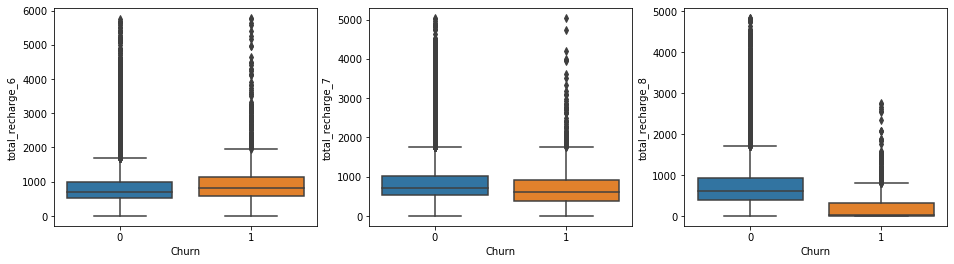

In [151]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'total_recharge_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'total_recharge_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'total_recharge_8', data = df_final) 

plt.show() 

In [152]:
round(df_final[['total_recharge_6','total_recharge_7','good_phase_avg_rech','total_recharge_8']].describe())

,total_recharge_6,total_recharge_7,good_phase_avg_rech,total_recharge_8
count,18563.0,18563.0,18563.0,18563.0
mean,866.0,862.0,864.0,709.0
std,622.0,618.0,487.0,628.0
min,0.0,0.0,478.0,0.0
25%,523.0,510.0,567.0,333.0
50%,710.0,706.0,699.0,581.0
75%,1001.0,1004.0,959.0,885.0
max,5775.0,5033.0,5164.0,4823.0


In [153]:
#We can see that mean value of total recharge is higher in Good phase (average of 6th and 7th month) 
#than the action phase (i.e.8th month)

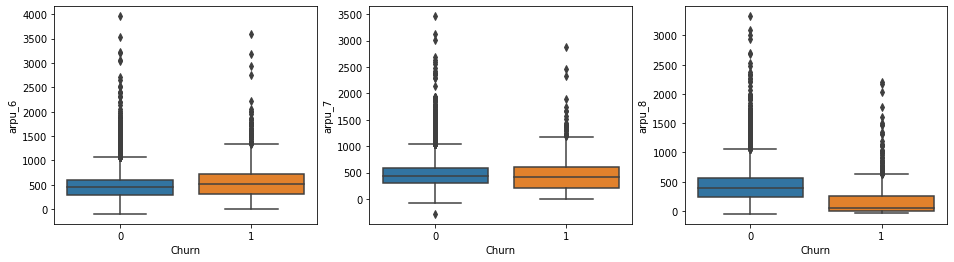

In [154]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'arpu_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'arpu_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'arpu_8', data = df_final) 

plt.show()

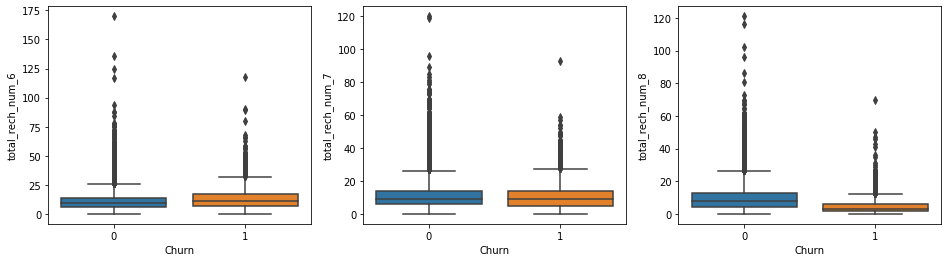

In [155]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'total_rech_num_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'total_rech_num_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'total_rech_num_8', data = df_final) 

plt.show()   

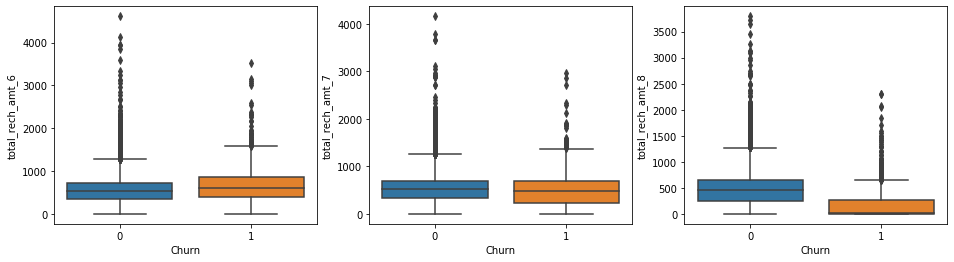

In [156]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'total_rech_amt_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'total_rech_amt_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'total_rech_amt_8', data = df_final) 

plt.show() 

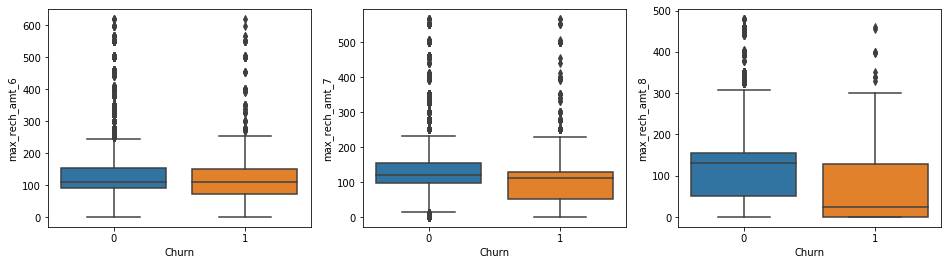

In [157]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'max_rech_amt_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'max_rech_amt_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'max_rech_amt_8', data = df_final) 

plt.show() 

In [158]:
round(df_final[['max_rech_amt_6','max_rech_amt_6','max_rech_amt_8','good_phase_max_rech_amt_avg']].describe())

,max_rech_amt_6,max_rech_amt_6,max_rech_amt_8,good_phase_max_rech_amt_avg
count,18563.0,18563.0,18563.0,18563.0
mean,136.0,136.0,123.0,136.0
std,92.0,92.0,86.0,82.0
min,0.0,0.0,0.0,0.0
25%,90.0,90.0,50.0,85.0
50%,110.0,110.0,130.0,119.0
75%,154.0,154.0,154.0,160.0
max,619.0,619.0,479.0,584.0


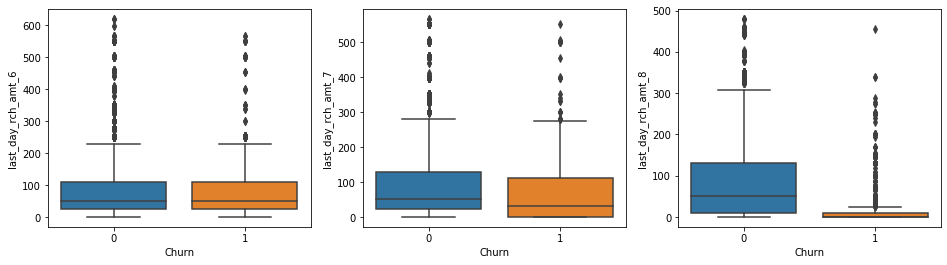

In [159]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'last_day_rch_amt_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'last_day_rch_amt_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'last_day_rch_amt_8', data = df_final) 

plt.show() 

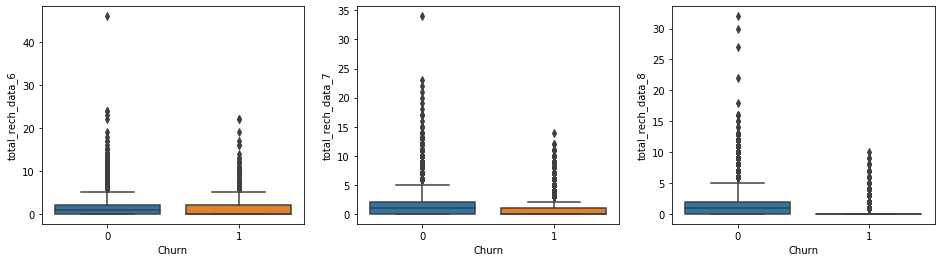

In [160]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn',y='total_rech_data_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn',y= 'total_rech_data_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn',y='total_rech_data_8', data = df_final) 

plt.show() 

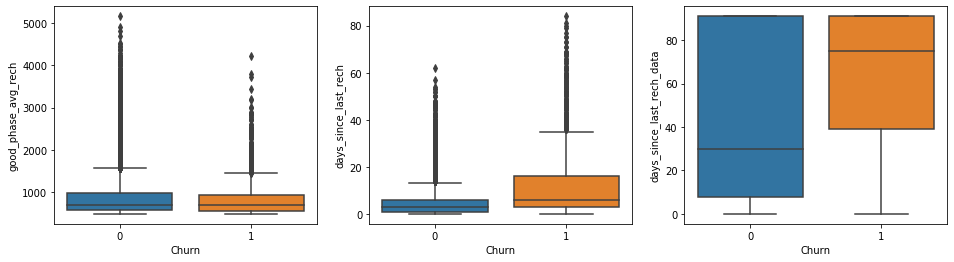

In [161]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'good_phase_avg_rech', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'days_since_last_rech', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'days_since_last_rech_data', data = df_final) 

plt.show() 

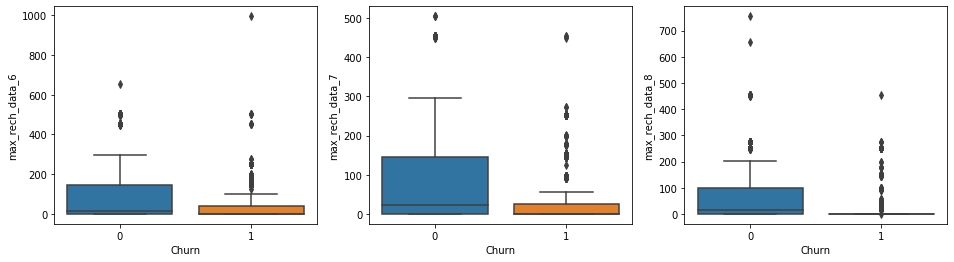

In [162]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'max_rech_data_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'max_rech_data_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'max_rech_data_8', data = df_final) 

plt.show() 

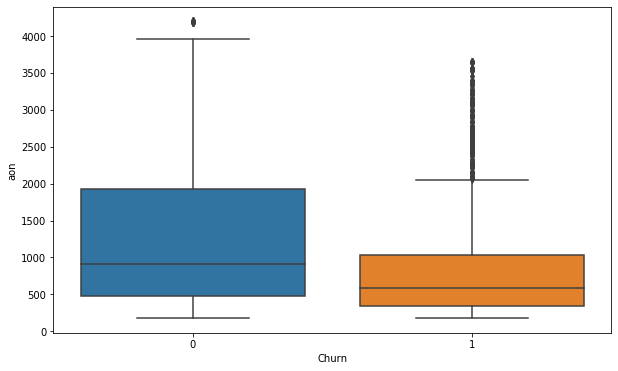

In [163]:
plt.figure(figsize=(10,6))
sns.boxplot( x = 'Churn',y='aon', data = df_final) 
plt.show()

In [164]:
#Clearly the people who are churning have lower age on network.

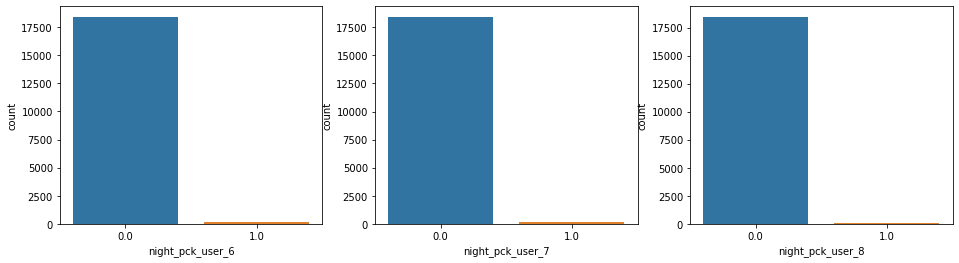

In [165]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.countplot( x = 'night_pck_user_6', data = df_final) 

plt.subplot(132)
sns.countplot(x = 'night_pck_user_7', data = df_final) 

plt.subplot(133)
sns.countplot(x =  'night_pck_user_8', data = df_final) 

plt.show() 

In [166]:
df_final['night_pck_user_6'].value_counts()

0.0    18406
1.0      157
Name: night_pck_user_6, dtype: int64

In [167]:
df_final['night_pck_user_7'].value_counts()

0.0    18435
1.0      128
Name: night_pck_user_7, dtype: int64

In [168]:
df_final['night_pck_user_8'].value_counts()

0.0    18459
1.0      104
Name: night_pck_user_8, dtype: int64

In [169]:
#During the action phase, Number of people using night packs and who are going to churn is lesser. So, customers opting out of
#night packs can be an indication of churning.

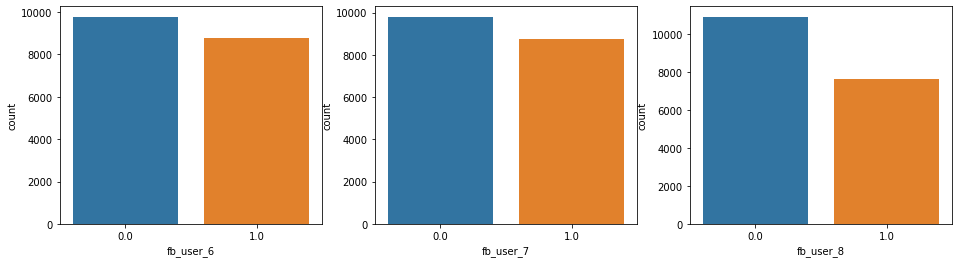

In [170]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.countplot(x = 'fb_user_6', data = df_final) 

plt.subplot(132)
sns.countplot(x =  'fb_user_7', data = df_final) 

plt.subplot(133)
sns.countplot(x = 'fb_user_8', data = df_final) 

plt.show() 

In [171]:
#Its clearly visible that people who are going to churn are using less facebook during action phase.
#So, customers opting out of FB user packs can be an indication of churning.

**Handling the Class imbalance**

In [172]:
round(100*(df_final['Churn'].value_counts()/len(df_final.index)),2)

0    91.35
1     8.65
Name: Churn, dtype: float64

In [173]:
df_final['Churn'].value_counts()

0    16957
1     1606
Name: Churn, dtype: int64

**The dataset contains ~8.5% data for Churners, it is an example of Imabalanced classes. So, for proper classification accuracy we will use class_weight='balanced' in models.**

In [174]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [175]:
# Putting feature variable to X
X = df_final.drop('Churn',axis=1)

# Putting response variable to y
y = df_final['Churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

<font color=green>**Class imbalance handling by SMOTE**

**Since the dataset is highly imbalanced with only 9.2% data available for Churners. We will use Synthetic minority oversampling technique (SMOTE) to generate data for minority class (1)**

In [176]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [177]:
sm = SMOTE('not majority')
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [178]:
df_final.shape

(18563, 176)

In [179]:
X_train_sm.shape

(23734, 175)

In [180]:
y_new=pd.DataFrame(y_train_sm)

In [181]:
y_new.head()

,0
0,0
1,0
2,0
3,0
4,0


In [182]:
y_new[0].value_counts()

1    11867
0    11867
Name: 0, dtype: int64

# Logistic regression with PCA

**Class balancing done by SMOTE**

In [183]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [184]:
#Doing the PCA on the train data
pca.fit(X_train_sm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [185]:
pca.components_

array([[ 5.36417390e-02,  5.81881031e-02,  4.04154568e-02, ...,
        -4.77046661e-03,  3.37982511e-02,  5.32739900e-02],
       [-5.45609919e-02,  4.80052134e-02,  1.15562800e-01, ...,
         3.79614461e-02,  1.82924604e-01,  4.65566408e-02],
       [ 6.99908235e-02, -1.82594434e-02,  2.73604519e-02, ...,
        -3.58170028e-02,  1.27462855e-01,  1.23861951e-01],
       ...,
       [-0.00000000e+00, -2.91361111e-18, -4.56826616e-18, ...,
         5.71281371e-17,  3.10098762e-17,  5.68121938e-17],
       [-0.00000000e+00, -4.83415079e-18, -5.72670178e-18, ...,
        -3.20110691e-17,  6.16911036e-17, -1.83501218e-17],
       [-0.00000000e+00,  3.03576608e-18,  9.91904517e-20, ...,
        -3.39490805e-18,  3.65918233e-17, -5.00901404e-17]])

In [186]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df.head()

,Feature,PC1,PC2
0,arpu_6,0.053642,-0.054561
1,arpu_7,0.058188,0.048005
2,arpu_8,0.040415,0.115563
3,onnet_mou_6,0.075196,-0.071960
4,onnet_mou_7,0.066870,0.006591


**Checking the distribution of features on PC1-PC2 plot**

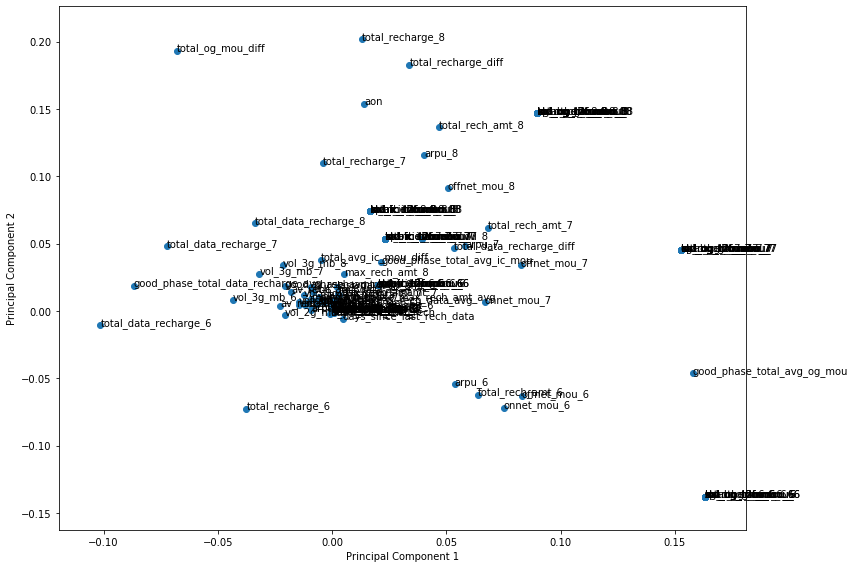

In [187]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

**Scree plot**

In [188]:
pca.explained_variance_ratio_

array([4.35209500e-01, 1.64686830e-01, 8.42051817e-02, 8.21051881e-02,
       5.69791560e-02, 4.09138826e-02, 3.65803842e-02, 2.48951210e-02,
       1.40177597e-02, 1.16312080e-02, 1.04296872e-02, 9.75649852e-03,
       5.59412253e-03, 4.35134767e-03, 2.69501828e-03, 2.59596138e-03,
       2.03143470e-03, 1.53427131e-03, 1.51213272e-03, 1.23559934e-03,
       1.05250901e-03, 7.41722607e-04, 6.47929395e-04, 5.81049863e-04,
       4.37316203e-04, 3.95532263e-04, 3.61604278e-04, 3.12430947e-04,
       2.93625649e-04, 2.58325156e-04, 2.43480597e-04, 2.20106764e-04,
       2.00880644e-04, 1.84862088e-04, 1.66182457e-04, 1.38020739e-04,
       1.19538375e-04, 1.08442528e-04, 9.31138076e-05, 9.16080361e-05,
       7.84707693e-05, 6.53912688e-05, 4.95879231e-05, 4.18601105e-05,
       3.88302245e-05, 2.72364874e-05, 2.46732556e-05, 2.12003419e-05,
       1.98946274e-05, 1.34303699e-05, 5.22015262e-06, 3.64489911e-06,
       9.88853263e-07, 4.93006756e-07, 2.27058907e-07, 9.78981488e-08,
      

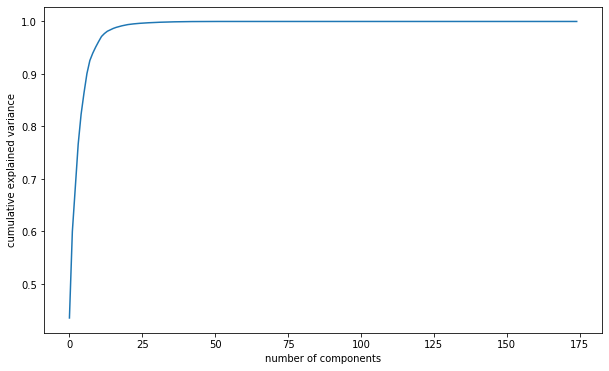

In [189]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Apparently, 20 components are enough to explain >95% variance in data**

In [190]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

In [191]:
df_train_pca = pca_final.fit_transform(X_train_sm)
df_train_pca.shape

(23734, 20)

In [192]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

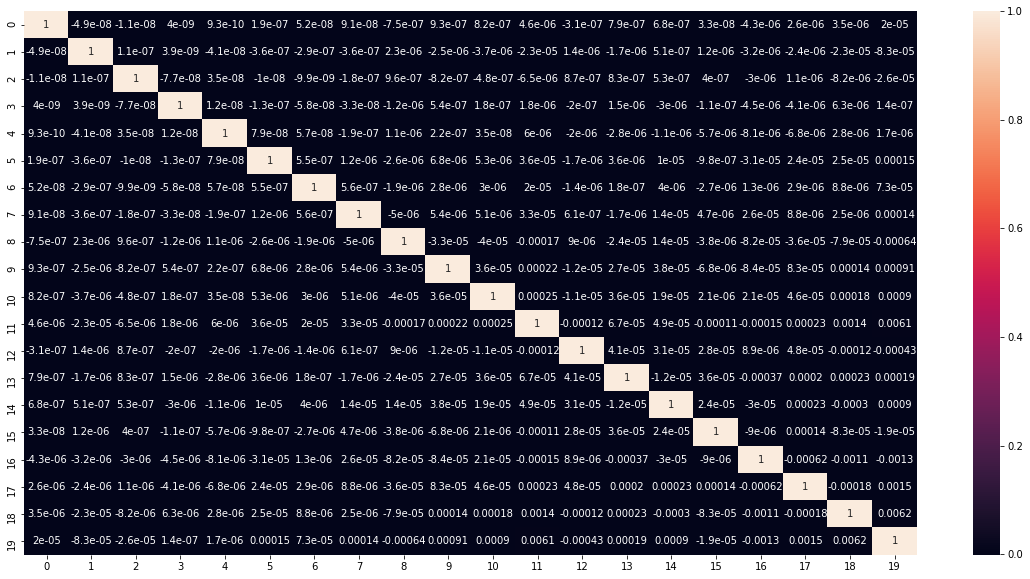

In [193]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [194]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.006224098963390693 , min corr:  -0.0013082736129706224


In [195]:
# we see that correlations are indeed very close to 0
#effectively, multicollinearity has been removed and  models will be much more stable

In [196]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5569, 20)

In [197]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train_sm)

In [198]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.9'

In [199]:
predict_pca=model_pca.predict(df_test_pca)

In [200]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [201]:
print(classification_report(y_test,predict_pca))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5090
           1       0.30      0.85      0.44       479

    accuracy                           0.82      5569
   macro avg       0.64      0.83      0.67      5569
weighted avg       0.92      0.82      0.85      5569



In [202]:
print(accuracy_score(y_test,predict_pca))

0.8175615011671754


In [203]:
from sklearn.metrics import roc_auc_score

In [204]:
roc_auc_score(y_test,predict_pca)

0.8302213599878594

**We can see that accuracy and auc score are good at >0.8. Recall is also good with >0.8 and that is what we require where mostly all the potential churners are identified by model. Precision is low at 0.31,but it indicates the non-churners classified as churners.**

# Random forest 

In [205]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Running the random forest with default parameters and no class balancing
rfc1 = RandomForestClassifier(class_weight=None)

In [206]:
# fit
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [207]:
# Making predictions
predictions1 = rfc1.predict(X_test)

In [208]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [209]:
# Let's check the report of our default model
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5090
           1       0.75      0.47      0.58       479

    accuracy                           0.94      5569
   macro avg       0.85      0.73      0.78      5569
weighted avg       0.94      0.94      0.94      5569



In [210]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions1))

[[5016   74]
 [ 252  227]]


In [211]:
print(accuracy_score(y_test,predictions1))

0.9414616627760819


In [212]:
roc_auc_score(y_test,predictions1)

0.7296828280922518

**Accuracy is very high at 0.94 however recall is very low at 0.47. High accuracy here indicates that this model is able to detect only the non-churners. Overall it is not a good model**

**Random forest with classes balanced by SMOTE**

In [213]:
# Running the random forest with default parameters.
rfc2 = RandomForestClassifier()

In [214]:
# fit
rfc2.fit(X_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [215]:
# Making predictions
predictions2 = rfc2.predict(X_test)

In [216]:
# Let's check the report of our default model
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5090
           1       0.58      0.63      0.61       479

    accuracy                           0.93      5569
   macro avg       0.77      0.80      0.79      5569
weighted avg       0.93      0.93      0.93      5569



In [217]:
print(accuracy_score(y_test,predictions2))

0.9297899084216197


In [218]:
roc_auc_score(y_test,predictions2)

0.7961096915233522

**Class balancing has improved the model slightly with recall increasing to 0.64. Still there is room for improvement with hyperparameter tuning.**

### Hyperparameter Tuning

### Tuning max_depth

In [219]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}

# instantiate the model

rfc3 = RandomForestClassifier()


# fit tree on training data
rf1 = GridSearchCV(rfc3, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf1.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [220]:
# scores of GridSearch CV
scores = rf1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.525379,0.053630,0.009011,0.004671,2,{'max_depth': 2},0.813184,0.808972,0.804467,0.809524,0.802360,0.807702,0.003847,8,0.818814,0.815074,0.810143,0.802086,0.804034,0.810030,0.006351
1,1.470088,0.084070,0.016452,0.005136,7,{'max_depth': 7},0.882477,0.908172,0.915297,0.908976,0.905605,0.904104,0.011275,7,0.920784,0.918730,0.915104,0.912576,0.916684,0.916776,0.002840
2,2.743440,0.090321,0.026062,0.007771,12,{'max_depth': 12},0.928180,0.946714,0.953434,0.949220,0.944374,0.944384,0.008641,6,0.977984,0.974876,0.975142,0.976143,0.975142,0.975857,0.001148
3,3.275735,0.113776,0.021790,0.007299,17,{'max_depth': 17},0.931129,0.956192,0.962916,0.958070,0.956595,0.952979,0.011186,4,0.990361,0.989045,0.988624,0.990626,0.989678,0.989667,0.000758
4,3.522718,0.135073,0.020968,0.006578,22,{'max_depth': 22},0.927127,0.958719,0.963127,0.959123,0.955331,0.952684,0.013017,5,0.993574,0.994101,0.995365,0.993312,0.995629,0.994396,0.000938


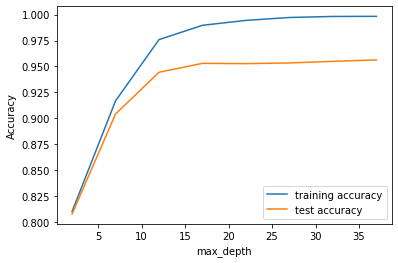

In [221]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [222]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(1, 40, 4)}

# instantiate the model (note we are specifying a max_depth)
rfc4 = RandomForestClassifier(max_depth=20)


# fit tree on training data
rf2 = GridSearchCV(rfc4, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf2.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [223]:
# scores of GridSearch CV
scores = rf2.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.376868,0.038286,0.012750,0.006390,1,{'n_estimators': 1},0.864785,0.893639,0.893384,0.897809,0.900337,0.889989,0.012872,10,0.960076,0.960181,0.953760,0.955340,0.954972,0.956866,0.002715
1,1.736372,0.019995,0.020122,0.006135,5,{'n_estimators': 5},0.925864,0.951980,0.953645,0.954488,0.943321,0.945858,0.010760,9,0.988255,0.990203,0.989046,0.988361,0.987940,0.988761,0.000807
2,3.041429,0.106113,0.020439,0.006272,9,{'n_estimators': 9},0.935973,0.959141,0.961231,0.960809,0.954277,0.954285,0.009485,8,0.990888,0.991520,0.992680,0.990942,0.993101,0.991826,0.000907
3,4.449202,0.106735,0.028522,0.005428,13,{'n_estimators': 13},0.935131,0.957456,0.963127,0.962073,0.958070,0.955170,0.010259,7,0.992995,0.993100,0.992838,0.992996,0.993312,0.993048,0.000156
4,5.821364,0.089764,0.038630,0.009672,17,{'n_estimators': 17},0.941028,0.959351,0.967973,0.967762,0.956595,0.958540,0.009851,6,0.992837,0.993996,0.992838,0.992785,0.993628,0.993216,0.000500


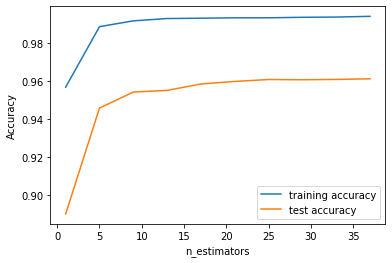

In [224]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [225]:
#at n_estimators=32, train and test accuracy are both peaking beyond which the curve is flat
#Hence, selecting n_estimators=32

### Tuning max_features

In [226]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rfc5 = RandomForestClassifier(max_depth=20)


# fit tree on training data
rf3 = GridSearchCV(rfc5, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf3.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [227]:
# scores of GridSearch CV
scores = rf3.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.138310,0.022328,0.026458,0.008169,4,{'max_features': 4},0.934920,0.953033,0.953645,0.950063,0.945217,0.947375,0.006905,5,0.993522,0.995365,0.991626,0.994102,0.993996,0.993722,0.001213
1,2.147003,0.062658,0.023214,0.007379,8,{'max_features': 8},0.931340,0.950505,0.963759,0.960598,0.957649,0.952768,0.011579,4,0.992099,0.994891,0.993470,0.993259,0.993259,0.993396,0.000890
2,3.695667,0.038335,0.023008,0.007605,14,{'max_features': 14},0.931971,0.957666,0.964391,0.959966,0.954067,0.953611,0.011328,3,0.993522,0.994259,0.992469,0.991837,0.992311,0.992879,0.000882
3,5.386730,0.138500,0.026167,0.007682,20,{'max_features': 20},0.922704,0.962932,0.966920,0.962495,0.960388,0.955086,0.016330,2,0.990677,0.992099,0.993733,0.992416,0.991310,0.992047,0.001039
4,6.414796,0.146852,0.030845,0.008153,24,{'max_features': 24},0.929655,0.958088,0.963759,0.964391,0.960598,0.955296,0.013022,1,0.992626,0.991994,0.992574,0.992364,0.992416,0.992395,0.000223


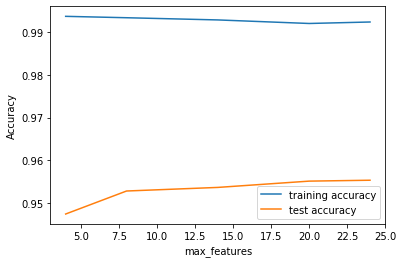

In [228]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [229]:
# At max_features=~8 , train and test accuracies are peaking

### Tuning min_samples_leaf

In [230]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(10, 400, 50)}

# instantiate the model
rfc6 = RandomForestClassifier()


# fit tree on training data
rf4 = GridSearchCV(rfc6, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf4.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [231]:
# scores of GridSearch CV
scores = rf4.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.032961,0.061060,0.027537,0.006834,10,{'min_samples_leaf': 10},0.911542,0.940396,0.946692,0.945217,0.935946,0.935957,0.012782,1,0.961129,0.960550,0.958921,0.960501,0.957289,0.959678,0.001402
1,2.441171,0.105257,0.026978,0.007975,60,{'min_samples_leaf': 60},0.880160,0.897852,0.909608,0.904973,0.898230,0.898163,0.010016,2,0.913094,0.903666,0.910628,0.908469,0.905625,0.908296,0.003378
2,2.049230,0.045532,0.023057,0.008072,110,{'min_samples_leaf': 110},0.873842,0.885847,0.892752,0.891066,0.881795,0.885059,0.006817,3,0.904667,0.893922,0.891300,0.883716,0.888667,0.892454,0.006976
3,1.904768,0.038244,0.017918,0.007749,160,{'min_samples_leaf': 160},0.862679,0.883741,0.875474,0.878424,0.878213,0.875706,0.007043,4,0.884178,0.884547,0.873499,0.876764,0.881451,0.880088,0.004311
4,1.786541,0.016477,0.023367,0.007874,210,{'min_samples_leaf': 210},0.854254,0.855518,0.875474,0.882006,0.873788,0.868206,0.011226,5,0.875382,0.865322,0.872867,0.875711,0.881030,0.874062,0.005115


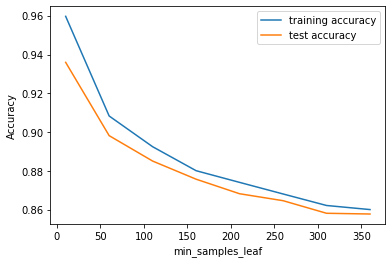

In [232]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [233]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(10, 500, 50)}

# instantiate the model
rfc7 = RandomForestClassifier()


# fit tree on training data
rf5 = GridSearchCV(rfc7, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf5.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [234]:
# scores of GridSearch CV
scores = rf5.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.553089,0.063124,0.030819,0.007057,10,{'min_samples_split': 10},0.929444,0.950927,0.959966,0.956595,0.949642,0.949313,0.010622,1,0.992363,0.989466,0.989730,0.990520,0.990573,0.990530,0.001013
1,3.511812,0.105182,0.026584,0.008505,60,{'min_samples_split': 60},0.902275,0.929655,0.938685,0.940582,0.933839,0.929005,0.013901,2,0.958548,0.950964,0.954129,0.951127,0.950390,0.953032,0.003050
2,3.369405,0.072667,0.024309,0.006739,110,{'min_samples_split': 110},0.889006,0.918703,0.924568,0.928782,0.917193,0.915648,0.013955,3,0.943221,0.933372,0.930851,0.937276,0.933432,0.935630,0.004315
3,3.200389,0.092254,0.023184,0.007851,160,{'min_samples_split': 160},0.887742,0.908382,0.909819,0.918247,0.912137,0.907264,0.010328,4,0.931950,0.921468,0.916000,0.920739,0.922846,0.922601,0.005211
4,3.100834,0.109315,0.020886,0.006749,210,{'min_samples_split': 210},0.877422,0.904802,0.907922,0.915086,0.904340,0.901913,0.012836,5,0.920520,0.911408,0.912524,0.914525,0.912155,0.914226,0.003312


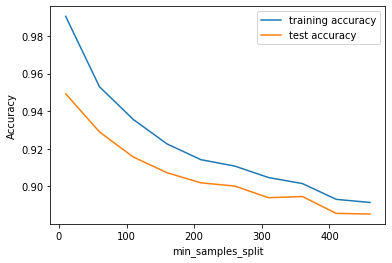

In [235]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [236]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10,15,20],
    'min_samples_leaf': range(10,200,50),
    'min_samples_split': range(10,300,50),
    'n_estimators': range(1,20,5), 
    'max_features': [5,10,15]
}
# Create a based model
rf_gs = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gs, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

In [237]:
# Fit the grid search to the data
grid_search.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 29.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [238]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9358304542007247 using {'max_depth': 20, 'max_features': 15, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 16}


In [239]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=15,
                             n_estimators=16,n_jobs=-1)

In [240]:
# fit
rfc_final.fit(X_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [241]:
# predict
predictions_final = rfc_final.predict(X_test)

In [242]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [243]:
print(classification_report(y_test,predictions_final))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      5090
           1       0.51      0.73      0.60       479

    accuracy                           0.92      5569
   macro avg       0.74      0.83      0.78      5569
weighted avg       0.93      0.92      0.92      5569



In [244]:
print(confusion_matrix(y_test,predictions_final))

[[4757  333]
 [ 128  351]]


In [245]:
print(accuracy_score(y_test,predictions_final))

0.9172203268091219


In [246]:
roc_auc_score(y_test,predictions_final)

0.8336771105487447

**This is a good model with Accuracy at 0.92 and recall at 0.74. However logistic regression is best among all the models built for prediction as it has highest recall at 0.84. This means the model with highest recall will be best at predicting Churners accurately and with highest rates**

# Determining the important features

In [247]:
col_names=df.columns
col_names=list(col_names)
col_names.remove('Churn')

In [248]:
feat_labels=col_names

In [249]:
for feature in zip(feat_labels, rfc_final.feature_importances_):
    print(feature)

('arpu_6', 0.0014945984285423804)
('arpu_7', 0.0027242639555928806)
('arpu_8', 0.006483097709344972)
('onnet_mou_6', 0.004448277893545554)
('onnet_mou_7', 0.00270102971845934)
('onnet_mou_8', 0.002406847175237576)
('offnet_mou_6', 0.0016867475073568039)
('offnet_mou_7', 0.0013277230881369334)
('offnet_mou_8', 0.001904316379528708)
('roam_ic_mou_6', 0.0018953897352190544)
('roam_ic_mou_7', 0.0009187372823478128)
('roam_ic_mou_8', 0.004216577443379735)
('roam_og_mou_6', 0.001533687651011268)
('roam_og_mou_7', 0.001130752209017055)
('roam_og_mou_8', 0.022702192800839783)
('loc_og_t2t_mou_6', 0.0011873598769743636)
('loc_og_t2t_mou_7', 0.003409006850090178)
('loc_og_t2t_mou_8', 0.0030545828687948487)
('loc_og_t2m_mou_6', 0.001387998343155521)
('loc_og_t2m_mou_7', 0.001618663187843193)
('loc_og_t2m_mou_8', 0.0022397009661829013)
('loc_og_t2f_mou_6', 0.0014193467148285628)
('loc_og_t2f_mou_7', 0.0017815071238003253)
('loc_og_t2f_mou_8', 0.0016112018045103369)
('loc_og_t2c_mou_6', 0.000889745

<font color=red>**Plotting the feature importance**

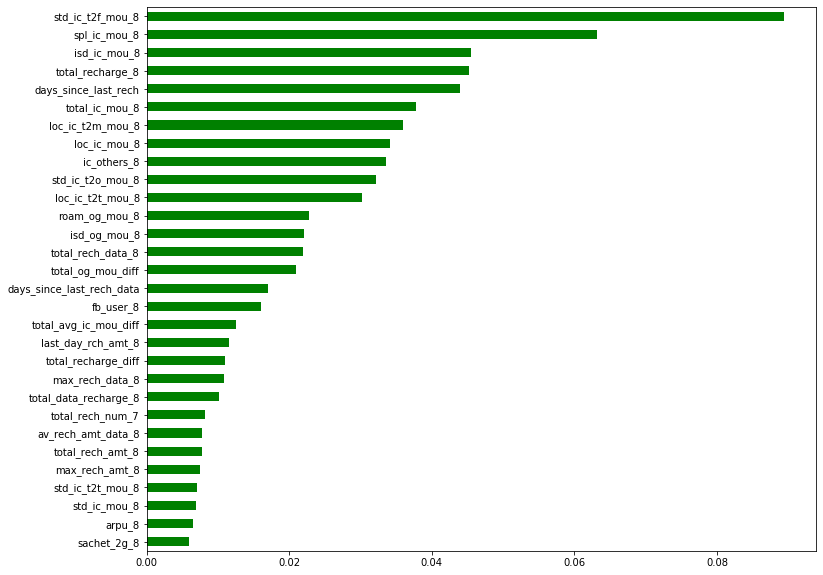

In [250]:
feat_importances = pd.Series(rfc_final.feature_importances_, index=col_names)
fig = plt.figure(figsize=(12,10))
feat_importances.nlargest(30).sort_values(ascending=True).plot(kind='barh',color='g', align='center')
plt.show()

In [251]:
top_30=feat_importances.nlargest(30)

<font color=red>**Top 30 features influecing and indicative of Customer Churn, displayed in the descending order of importance**

In [252]:
top_30.sort_values(ascending=False)

std_ic_t2f_mou_8             0.089470
spl_ic_mou_8                 0.063163
isd_ic_mou_8                 0.045567
total_recharge_8             0.045183
days_since_last_rech         0.044018
total_ic_mou_8               0.037839
loc_ic_t2m_mou_8             0.036001
loc_ic_mou_8                 0.034158
ic_others_8                  0.033590
std_ic_t2o_mou_8             0.032188
loc_ic_t2t_mou_8             0.030151
roam_og_mou_8                0.022702
isd_og_mou_8                 0.022084
total_rech_data_8            0.021965
total_og_mou_diff            0.020921
days_since_last_rech_data    0.017080
fb_user_8                    0.015981
total_avg_ic_mou_diff        0.012521
last_day_rch_amt_8           0.011604
total_recharge_diff          0.010948
max_rech_data_8              0.010867
total_data_recharge_8        0.010208
total_rech_num_7             0.008126
av_rech_amt_data_8           0.007713
total_rech_amt_8             0.007694
max_rech_amt_8               0.007547
std_ic_t2t_m

<font color=red>**Visualising some of these important features to understand how the Customer behaviour is changing**

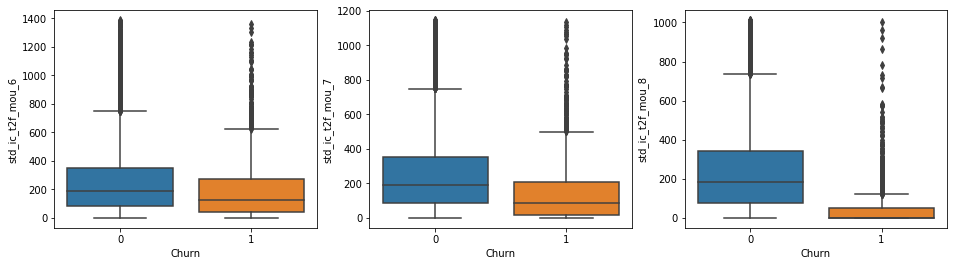

In [253]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'std_ic_t2f_mou_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'std_ic_t2f_mou_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'std_ic_t2f_mou_8', data = df_final) 

plt.show() 

In [261]:
#In the action phase, STD IC calls from operator T to fixed lines of T are lower than good phase.

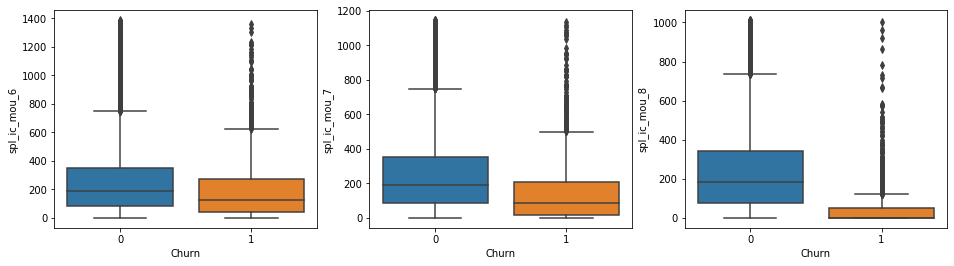

In [254]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'spl_ic_mou_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'spl_ic_mou_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'spl_ic_mou_8', data = df_final) 

plt.show()

In [262]:
#Special incoming calls are also lower in acion phase.

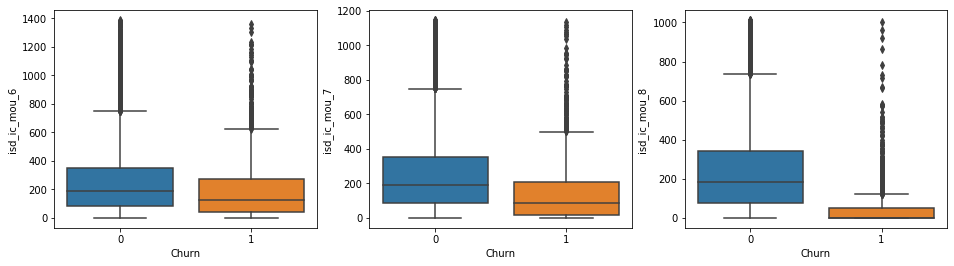

In [255]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'isd_ic_mou_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'isd_ic_mou_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'isd_ic_mou_8', data = df_final) 

plt.show()

In [263]:
#ISD incoming calls are also lower in action phase.

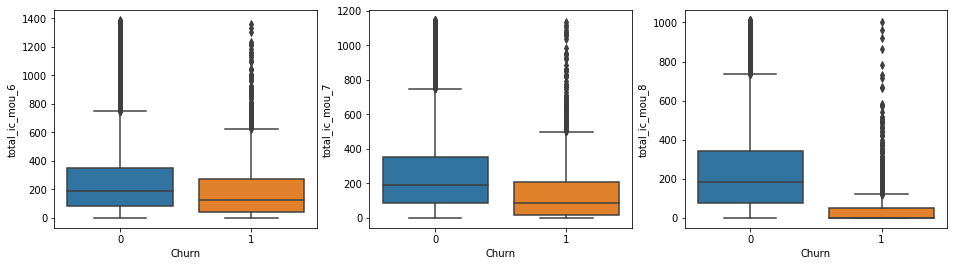

In [259]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'total_ic_mou_6', data = df_final) 

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'total_ic_mou_7', data = df_final) 

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'total_ic_mou_8', data = df_final) 

plt.show()

In [ ]:
#Total incoming calls are clearly lower in action phase.

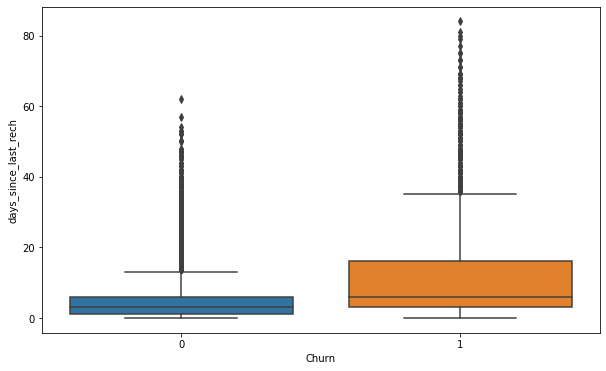

In [257]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Churn', y = 'days_since_last_rech', data = df_final) 
plt.show()

In [264]:
#It is evident that potential Churners have spent more time since last recharge. that means if a customer is not recharging for
#many days,it is a very strong indicator of potential Churn.

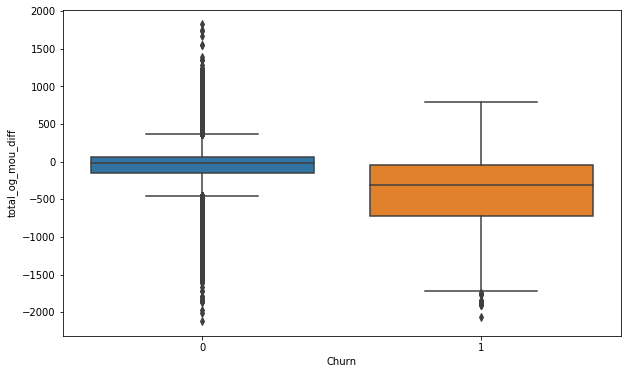

In [260]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Churn', y = 'total_og_mou_diff', data = df_final) 
plt.show()

In [265]:
#'total_og_mou_diff' indicates the difference in outgoing usage of action phase over good phase.
#ts clear that potential Churners have clearly dropped the outgoing calls over good phase.
#Reduced outgoing usage is a strong indicator of Churning.

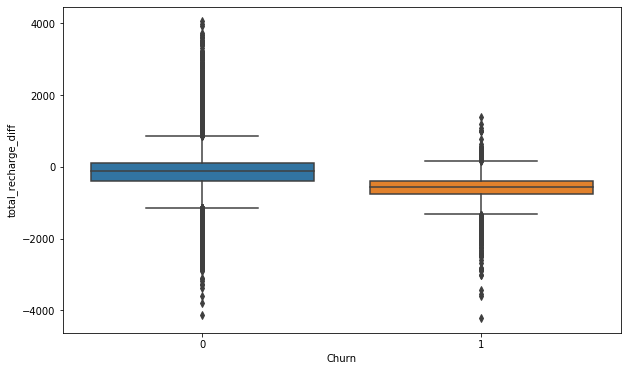

In [258]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Churn', y = 'total_recharge_diff', data = df_final) 
plt.show()

In [266]:
#Total recharge difference indicates the difference of recharge in action phase over good phase.
#Its very clear that potential churners are recharging much lesser than non-churners.

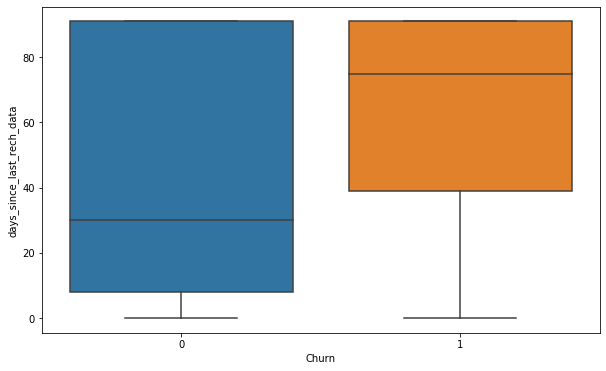

In [269]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Churn', y = 'days_since_last_rech_data', data = df_final) 
plt.show()

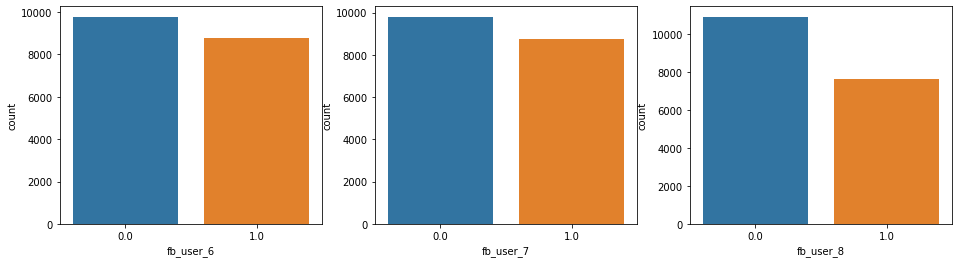

In [272]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.countplot(x = 'fb_user_6', data = df_final) 

plt.subplot(132)
sns.countplot(x = 'fb_user_7', data = df_final) 

plt.subplot(133)
sns.countplot(x =  'fb_user_8', data = df_final) 

plt.show()

In [ ]:
#Its clear that in action phase, churners have reduced the use of facebook and other social networks.

# Conclusion

**1. From the list of top 30 variables and above plots it is clear that Churn tendency of a Customer gets visible in Action phase, hence the company must try to retain such potential churners by better offerings.**

**2.To reduce or prevent churning, the company may think of reducing the tarriffs for such customers.**

**3. Lesser usage of fb and social networking and less data recharges are also indicative of potential churning. The company must roll out lucrative internet packages if such behaviour changes are observed in action phase.**